In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

In [287]:
df = pd.read_csv("precio_coches_train.csv")

df

,Precio,Combustible,Año,Km,CV,Provincia,Marca
0,7999,Diésel,1993,293234,115.0,Zaragoza,NISSAN
1,10990,Gasolina,1993,187000,320.0,Valencia,MERCEDES-BENZ
2,5990,Gasolina,1993,80000,145.0,Madrid,MITSUBISHI
3,79000,Gasolina,1993,169000,250.0,Barcelona,PORSCHE
4,4950,Gasolina,1993,250000,109.0,Ávila,MERCEDES-BENZ
...,...,...,...,...,...,...,...
99299,528000,Gasolina,2023,270,700.0,Murcia,ASTON
99300,194000,Gasolina,2023,60,535.0,Murcia,ASTON
99301,34900,Gasolina,2023,50,155.0,Vizcaya,FORD
99302,219000,Gasolina,2023,90,535.0,Murcia,ASTON


In [288]:
df.describe()

,Precio,Año,Km,CV
count,9.930400e+04,99304.000000,9.930400e+04,99044.000000
mean,3.406245e+04,2017.899299,7.292484e+04,166.660525
std,9.776664e+04,4.397941,6.402247e+04,270.486904
min,1.000000e+00,1993.000000,0.000000e+00,1.000000
25%,1.549900e+04,2017.000000,2.400000e+04,110.000000
50%,2.190000e+04,2019.000000,5.991900e+04,130.000000
75%,3.080000e+04,2021.000000,1.051770e+05,177.000000
max,6.800000e+06,2023.000000,3.280000e+06,63824.000000


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99304 entries, 0 to 99303
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precio       99304 non-null  int64  
 1   Combustible  99304 non-null  object 
 2   Año          99304 non-null  int64  
 3   Km           99304 non-null  int64  
 4   CV           99044 non-null  float64
 5   Provincia    99044 non-null  object 
 6   Marca        99304 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


<Axes: xlabel='Precio', ylabel='Count'>

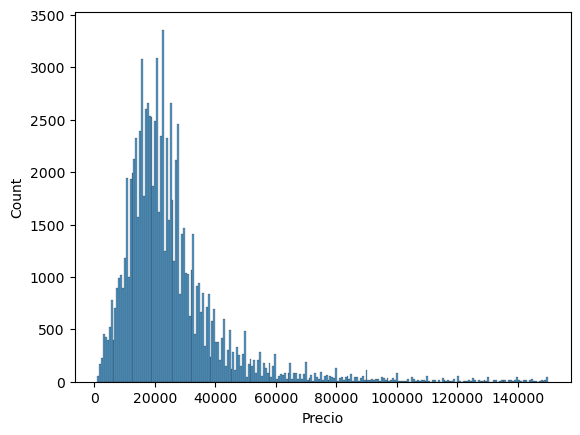

In [290]:
sns.histplot(df[df["Precio"].between(1000,150000)]["Precio"])


In [291]:
df=df[df["Precio"].between(1000,90000)]
df.shape

(95631, 7)

<Axes: xlabel='Año', ylabel='Count'>

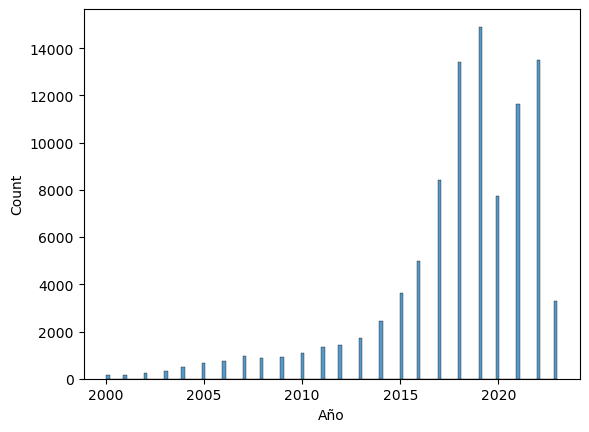

In [292]:
sns.histplot(df[df["Año"]>=2000]["Año"])

In [293]:
df=df[df["Año"]>=2000]
df.shape

(95175, 7)

<Axes: xlabel='Km', ylabel='Count'>

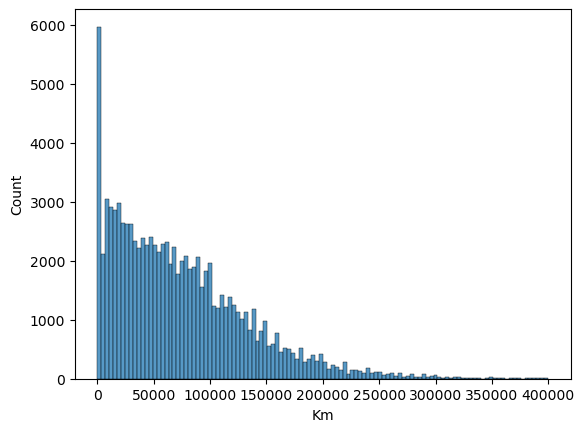

In [294]:
sns.histplot(df[df["Km"]<=400000]["Km"])

In [295]:
df=df[df["Km"]<=250000]
df.shape

(93821, 7)

<Axes: xlabel='CV', ylabel='Count'>

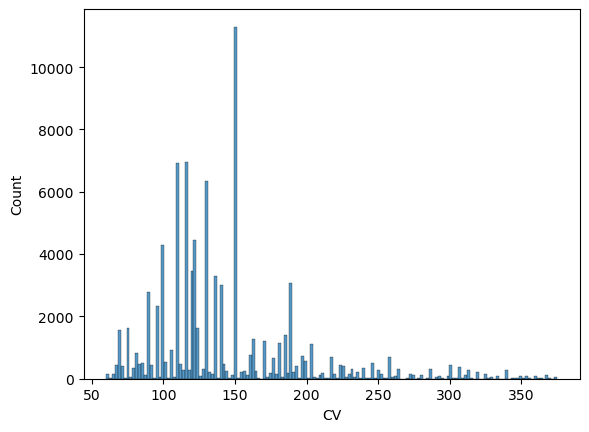

In [296]:
sns.histplot(df[df["CV"].between(60,375)]["CV"])

In [297]:
df=df[df["CV"].between(60,350)]
df.shape

(91062, 7)

In [298]:
df.isnull().sum()

Precio         0
Combustible    0
Año            0
Km             0
CV             0
Provincia      0
Marca          0
dtype: int64

In [299]:
from sklearn.preprocessing import LabelEncoder


In [300]:
prov_labelEncoding=LabelEncoder()
prov = prov_labelEncoding.fit_transform(df["Provincia"]) # En este ejemplo estoy usando fit_transform()

df["Provincia"] = prov

df

,Precio,Combustible,Año,Km,CV,Provincia,Marca
70,3590,Gasolina,2000,156624,163.0,34,MERCEDES-BENZ
72,3499,Gasolina,2000,190000,102.0,31,VOLKSWAGEN
73,2490,Gasolina,2000,170000,122.0,46,VOLVO
76,9990,Gasolina,2000,210500,204.0,29,PORSCHE
78,7900,Gasolina,2000,106255,240.0,29,JAGUAR
...,...,...,...,...,...,...,...
99293,25500,Gasolina,2023,1,129.0,50,SUZUKI
99294,24990,Híbrido,2023,1378,122.0,29,TOYOTA
99296,29900,Gasolina,2023,50,125.0,46,FORD
99301,34900,Gasolina,2023,50,155.0,46,FORD


In [301]:
comb_labelEncoding=LabelEncoder()

In [302]:
comb = comb_labelEncoding.fit_transform(df["Combustible"]) # En este ejemplo estoy usando fit_transform()

df["Combustible"] = comb

df

,Precio,Combustible,Año,Km,CV,Provincia,Marca
70,3590,3,2000,156624,163.0,34,MERCEDES-BENZ
72,3499,3,2000,190000,102.0,31,VOLKSWAGEN
73,2490,3,2000,170000,122.0,46,VOLVO
76,9990,3,2000,210500,204.0,29,PORSCHE
78,7900,3,2000,106255,240.0,29,JAGUAR
...,...,...,...,...,...,...,...
99293,25500,3,2023,1,129.0,50,SUZUKI
99294,24990,4,2023,1378,122.0,29,TOYOTA
99296,29900,3,2023,50,125.0,46,FORD
99301,34900,3,2023,50,155.0,46,FORD


In [303]:
marca_labelEncoding=LabelEncoder()

In [304]:
marca = marca_labelEncoding.fit_transform(df["Marca"]) # En este ejemplo estoy usando fit_transform()

df["Marca"] = marca

df

,Precio,Combustible,Año,Km,CV,Provincia,Marca
70,3590,3,2000,156624,163.0,34,41
72,3499,3,2000,190000,102.0,31,66
73,2490,3,2000,170000,122.0,46,67
76,9990,3,2000,210500,204.0,29,51
78,7900,3,2000,106255,240.0,29,27
...,...,...,...,...,...,...,...
99293,25500,3,2023,1,129.0,50,61
99294,24990,4,2023,1378,122.0,29,65
99296,29900,3,2023,50,125.0,46,18
99301,34900,3,2023,50,155.0,46,18


In [305]:
#separamos columnas
# Ahora vamos a separar la columna "objetivo" del resto de columnas
df_precio=df["Precio"].copy()
# Como ya tenemos la columna "objetivo" en otra variable vamos a eliminarla del DataFrame original
df.drop("Precio", axis=1 , inplace= True)

In [306]:
df

,Combustible,Año,Km,CV,Provincia,Marca
70,3,2000,156624,163.0,34,41
72,3,2000,190000,102.0,31,66
73,3,2000,170000,122.0,46,67
76,3,2000,210500,204.0,29,51
78,3,2000,106255,240.0,29,27
...,...,...,...,...,...,...
99293,3,2023,1,129.0,50,61
99294,4,2023,1378,122.0,29,65
99296,3,2023,50,125.0,46,18
99301,3,2023,50,155.0,46,18


In [307]:
#normalizacion de datos

from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()

X = x_scaler.fit_transform(df)

print(X)

[[6.00000000e-01 0.00000000e+00 6.26496000e-01 3.55172414e-01
  6.80000000e-01 6.11940299e-01]
 [6.00000000e-01 0.00000000e+00 7.60000000e-01 1.44827586e-01
  6.20000000e-01 9.85074627e-01]
 [6.00000000e-01 0.00000000e+00 6.80000000e-01 2.13793103e-01
  9.20000000e-01 1.00000000e+00]
 ...
 [6.00000000e-01 1.00000000e+00 2.00000000e-04 2.24137931e-01
  9.20000000e-01 2.68656716e-01]
 [6.00000000e-01 1.00000000e+00 2.00000000e-04 3.27586207e-01
  9.20000000e-01 2.68656716e-01]
 [6.00000000e-01 1.00000000e+00 4.00000000e-06 7.93103448e-02
  1.00000000e+00 9.10447761e-01]]


In [308]:
df_precioDF=pd.DataFrame(df_precio)

In [309]:
y_scaler = MinMaxScaler()

Y = y_scaler.fit_transform(df_precioDF)

print(Y)

[[0.02910112]
 [0.02807865]
 [0.01674157]
 ...
 [0.3247191 ]
 [0.38089888]
 [0.21910112]]


In [310]:
from sklearn.model_selection import train_test_split

In [311]:
#TRAIN TEST
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((72849, 6), (72849, 1))
Conjunto de Test: ((18213, 6), (18213, 1))


In [312]:
#ALGORITMO DE REGRESION LINEAL

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)


weights: [[-6.89761336e-02  2.47512643e-01 -1.92512711e-01  5.39760783e-01
  -6.88024015e-03  5.27689916e-04]]
w_0: [-0.01451355]


In [313]:
#PREDICCIONES
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")


Predicción:[0.33636796] 	Valor real:[0.35393258]
Predicción:[0.16528974] 	Valor real:[0.13932584]
Predicción:[0.33227281] 	Valor real:[0.30224719]
Predicción:[0.40031839] 	Valor real:[0.32011236]
Predicción:[0.35214076] 	Valor real:[0.38089888]


In [314]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [315]:
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(mae)
print(mse)
print(r2)

0.047530031307592015
0.004681233972869007
0.7531181701426042


In [327]:
## K Neighbours Regression

knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [328]:
yhat2 = knr.predict(X_test)

yhat2

array([[0.3464687 ],
       [0.15822632],
       [0.30094703],
       ...,
       [0.65104334],
       [0.25532103],
       [0.23626324]])

In [329]:
#METRICA
r2 = r2_score(y_test, yhat2)
r2

0.8703099373552152

In [319]:
%%time

list_r2 = list()

for k in range(1, 25):
    
    # Modelo
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train, y_train)
    
    # Predicciones
    yhat = knr.predict(X_test)
    
    # Metricas
    r2 = r2_score(y_test, yhat)
    list_r2.append([k, r2])
    
    print(f"k: {k}, Acurracy. {r2}")

k: 1, Acurracy. 0.8241238221489272
k: 2, Acurracy. 0.856635740928925
k: 3, Acurracy. 0.8667952128445915
k: 4, Acurracy. 0.8692153178977818
k: 5, Acurracy. 0.8702522087652976
k: 6, Acurracy. 0.869981603477219
k: 7, Acurracy. 0.8703099373552152
k: 8, Acurracy. 0.869339938628112
k: 9, Acurracy. 0.8688246412921434
k: 10, Acurracy. 0.8681347075301338
k: 11, Acurracy. 0.866949119964035
k: 12, Acurracy. 0.866146505252908
k: 13, Acurracy. 0.8651066325067747
k: 14, Acurracy. 0.8640105252022566
k: 15, Acurracy. 0.8630759865299292
k: 16, Acurracy. 0.862306315959683
k: 17, Acurracy. 0.8616993102494632
k: 18, Acurracy. 0.8606297606703961
k: 19, Acurracy. 0.8597374412595189
k: 20, Acurracy. 0.858818751086655
k: 21, Acurracy. 0.8579143143293438
k: 22, Acurracy. 0.8572114128263992
k: 23, Acurracy. 0.8565416427281267
k: 24, Acurracy. 0.8561555522094754
CPU times: total: 31.8 s
Wall time: 31.9 s


In [323]:
list_r2 = np.array(list_r2)

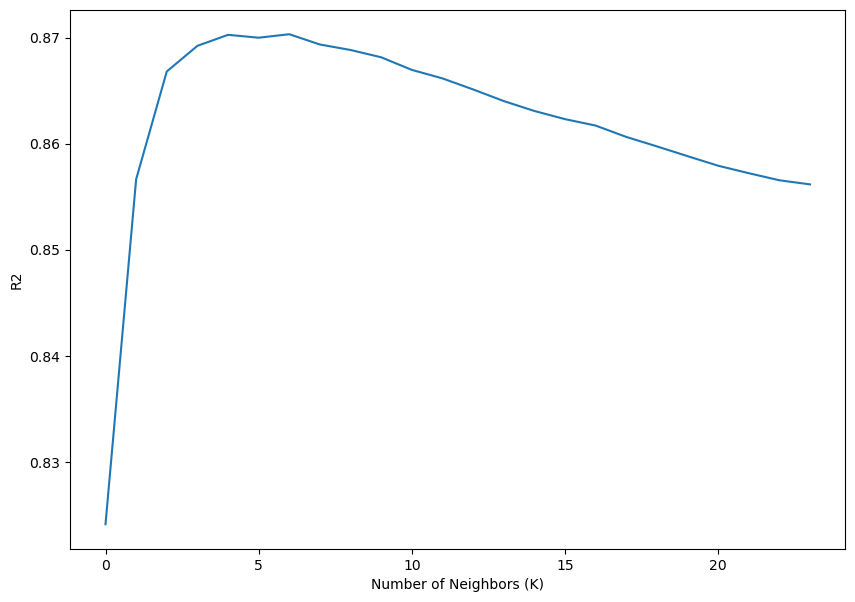

In [324]:
plt.figure(figsize = (10, 7))

plt.plot(list_r2[:, 1])

plt.ylabel("R2")
plt.xlabel("Number of Neighbors (K)")

plt.show()

In [325]:
mejor_indice = np.argmax(list_r2[:, 1])
mejor_indice

6

In [326]:
list_r2[mejor_indice, :]

array([7.        , 0.87030994])

In [341]:
df2=pd.read_csv("precio_coches_test.csv")

In [342]:
df2

,Precio,Combustible,Año,Km,CV,Provincia,Marca
0,139900,Gasolina,2020,37900,600,Madrid,AUDI
1,49900,Diésel,2022,31000,190,Madrid,BMW
2,27250,Diésel,2021,34236,120,Madrid,FORD
3,6900,Gasolina,2010,90000,69,Jaén,TOYOTA
4,27495,Híbrido,2022,27202,122,Valencia,TOYOTA
...,...,...,...,...,...,...,...
772,7990,Diésel,2017,135772,75,Madrid,OPEL
773,26490,Eléctrico,2020,94622,136,Madrid,HYUNDAI
774,8490,Diésel,2013,215411,115,Madrid,HYUNDAI
775,8790,Diésel,2017,117618,75,Madrid,OPEL


In [343]:
#df2 = df2.drop(df2[df2["Marca"] == "BENTLEY"].index)

df2 = df2.drop(df2[df2["Marca"] == "FERRARI"].index)
df2 = df2.drop(df2[df2["Marca"] == "BENTLEY"].index)

In [344]:
provincia = prov_labelEncoding.transform(df2["Provincia"])

df2["Provincia"] = provincia

df2

,Precio,Combustible,Año,Km,CV,Provincia,Marca
0,139900,Gasolina,2020,37900,600,29,AUDI
1,49900,Diésel,2022,31000,190,29,BMW
2,27250,Diésel,2021,34236,120,29,FORD
3,6900,Gasolina,2010,90000,69,22,TOYOTA
4,27495,Híbrido,2022,27202,122,44,TOYOTA
...,...,...,...,...,...,...,...
772,7990,Diésel,2017,135772,75,29,OPEL
773,26490,Eléctrico,2020,94622,136,29,HYUNDAI
774,8490,Diésel,2013,215411,115,29,HYUNDAI
775,8790,Diésel,2017,117618,75,29,OPEL


In [345]:
combustible = comb_labelEncoding.transform(df2["Combustible"])

df2["Combustible"] = combustible

df2

,Precio,Combustible,Año,Km,CV,Provincia,Marca
0,139900,3,2020,37900,600,29,AUDI
1,49900,0,2022,31000,190,29,BMW
2,27250,0,2021,34236,120,29,FORD
3,6900,3,2010,90000,69,22,TOYOTA
4,27495,4,2022,27202,122,44,TOYOTA
...,...,...,...,...,...,...,...
772,7990,0,2017,135772,75,29,OPEL
773,26490,1,2020,94622,136,29,HYUNDAI
774,8490,0,2013,215411,115,29,HYUNDAI
775,8790,0,2017,117618,75,29,OPEL


In [346]:
marca2 = marca_labelEncoding.transform(df2["Marca"])

df2["Marca"] = marca2

df2

,Precio,Combustible,Año,Km,CV,Provincia,Marca
0,139900,3,2020,37900,600,29,4
1,49900,0,2022,31000,190,29,5
2,27250,0,2021,34236,120,29,18
3,6900,3,2010,90000,69,22,65
4,27495,4,2022,27202,122,44,65
...,...,...,...,...,...,...,...
772,7990,0,2017,135772,75,29,47
773,26490,1,2020,94622,136,29,24
774,8490,0,2013,215411,115,29,24
775,8790,0,2017,117618,75,29,47


In [347]:
df2_precio = df2["Precio"].copy()

df2.drop("Precio", axis=1, inplace=True)

In [348]:
df2_precio

0      139900
1       49900
2       27250
3        6900
4       27495
        ...  
772      7990
773     26490
774      8490
775      8790
776     18490
Name: Precio, Length: 775, dtype: int64

In [349]:
df2_precioDF = pd.DataFrame(df2_precio)

In [350]:
X2 = x_scaler.transform(df2)
Y2 = y_scaler.transform(df2_precioDF)

In [354]:
yhat2 = regresion_lineal.predict(X2)

In [355]:
mae2 = mean_absolute_error(Y2, yhat2)
mse2 = mean_squared_error(Y2, yhat2)
r2_2 = r2_score(Y2, yhat2)

print(r2_2)

0.7673811136478459
